In [30]:
from __future__ import division
import vcf
import gzip
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
my_catalog = gzip.open("/Users/danieljeffries/Data/RADseq/MICE/batch_1.catalog.tags.tsv.gz",'r').readlines()

In [27]:
myvcf = vcf.Reader(open("/Users/danieljeffries/Data/RADseq/MICE/batch_1_test.vcf.altered", 'r'))

Loci = []

GCs = {}
Covs = {}
Hets = {}

for record in myvcf:    
    
    Loci.append(record.ID.split("_")[0])
    
    Locus_covs = []
    
    for sample in record.samples:
        
        Locus_covs.append(sample["DP"])
        
    Hets[record.ID.split("_")[0]] = record.heterozygosity
    Covs[record.ID.split("_")[0]] = np.mean(Locus_covs)


In [33]:
for line in my_catalog:
        
    locus_id = line.split()[2]
        
    if locus_id in Loci:    
        
        seq = line.split()[8]
            
        GC = (seq.count("G") + seq.count("C"))/len(seq)
            
        GCs[locus_id] = GC
        

In [55]:
print min(GCs.values())
print max(GCs.values())



0.236559139785
0.698924731183


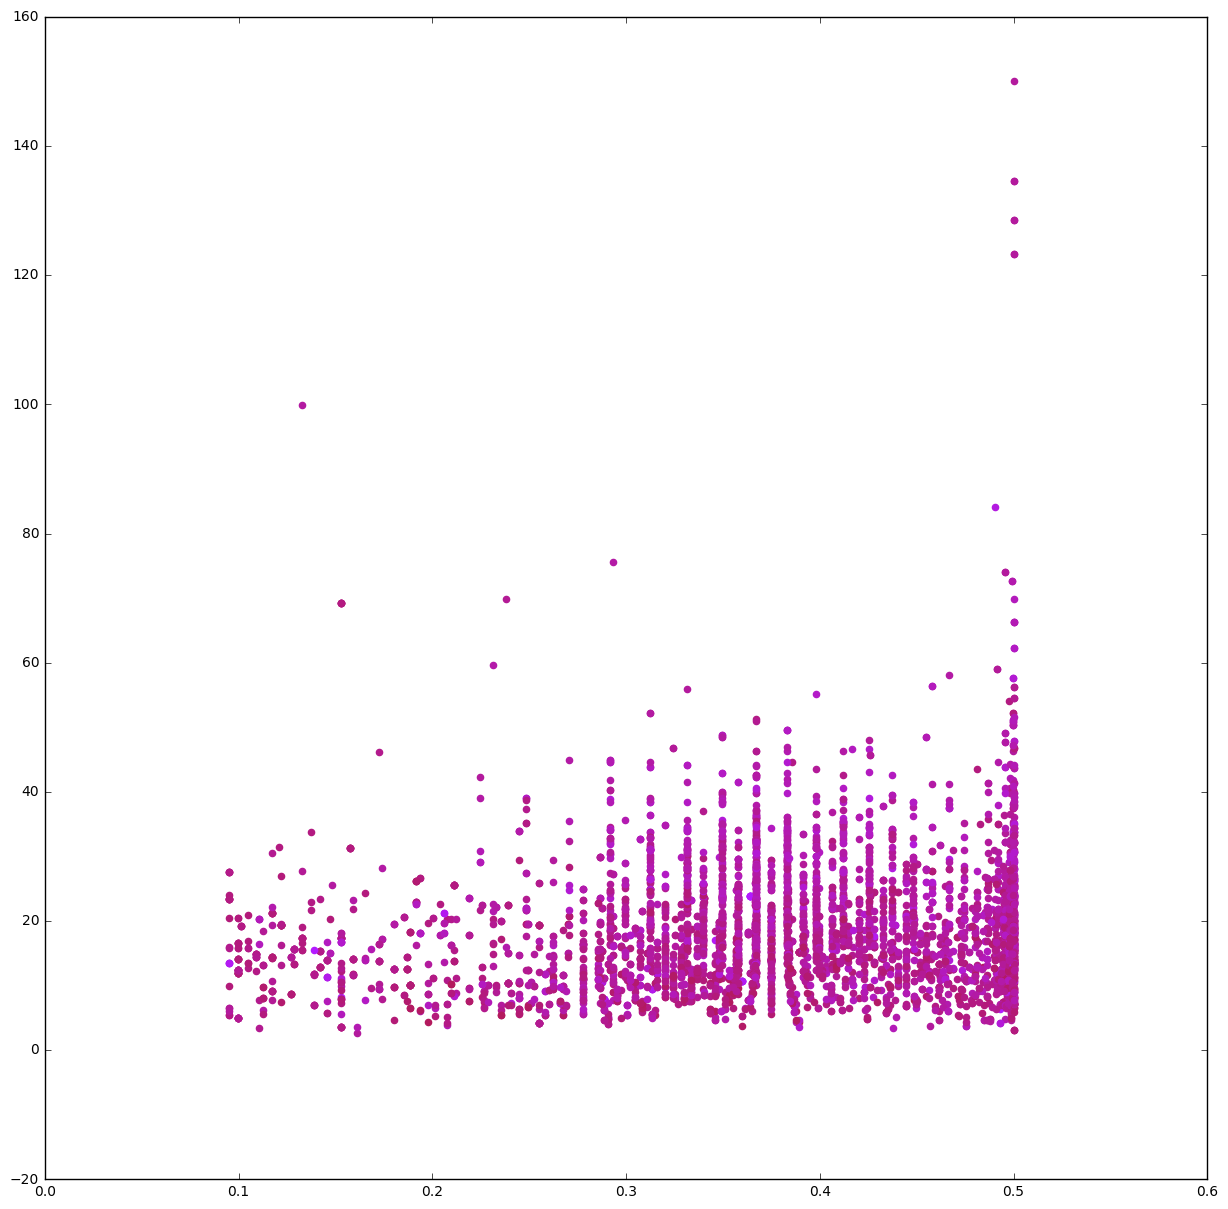

In [58]:
fig = plt.figure(figsize = (15,15))
#ax = fig.add_subplot(111, projection='3d')

for locus in Loci:
    max_het = max(Hets.values())
    max_cov = max(Covs.values())
    max_GC = max(GCs.values())
    
    R = Hets[locus]/max_het
    G = Covs[locus]/max_cov
    B = GCs[locus]/max_GC
    
    plt.scatter(Hets[locus], Covs[locus],  color = (0.7,0.1,B))
    #ax.set_zlim(-0.02,0.02)
    
plt.show()